In [2]:
import numpy as np
import pandas as pd
import ydata_profiling

import os
import sys
sys.path.append(os.getcwd())
from library.sb_utils import save_file

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read in raw data from Excel
concrete_data = pd.read_excel('data/Concrete_Data.xls')

In [4]:
#Inspect data
concrete_data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [5]:
#Make column names more manageable
column_list = list(concrete_data.columns)
new_columns = [col.split('(')[0].strip() for col in column_list]
concrete_data.columns = new_columns

In [6]:
#Check for missing values
concrete_data.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [7]:
#Check default data types
concrete_data.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [8]:
#make a ydata-profiling report
report = concrete_data.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 641.78it/s]


ydata profiling counts 11 duplicated rows. Let's see what pandas says

In [9]:
#See what pandas
concrete_data.duplicated().sum()

25

In [10]:
concrete_data.loc[concrete_data.duplicated()]

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
809   252.0                 0.0      0.0  185.0               0.0   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
77              852.1           887.1    3                      33.398217  
80              852.1           887.1    3                      33.398217  
86              944.7           755.8    3                      35.301171  
88              944.7           755.8    3                      35.301171  
91              944.7           755.8    3                      35.301171  
100             852.1           887.1    7                      49.201007  
103             852.1           887.1    7                      49.201007  
109             944.7           755.8    7                      55.895819  
111             944.7           755.8    7                      55.895819  
123             852.1           887.1   28                      60.294676  
126             852.1           887.1   28                      60.294676  
132             944.7           755.8   28                      71.298713  
134             944.7           755.8   28                      71.298713  
137             944.7           755.8   28                      71.298713  
146             852.1           887.1   56                      64.300532  
149             852.1           887.1   56                      64.300532  
155             944.7           755.8   56                      77.297154  
157             944.7           755.8   56                      77.297154  
160             944.7           755.8   56                      77.297154  
169             852.1           887.1   91                      65.196851  
172             852.1           887.1   91                      65.196851  
177             944.7           755.8   91                      79.296635  
179             944.7           755.8   91                      79.296635  
182             944.7           755.8   91                      79.296635  
809            1111.0           784.0   28                      19.691435

Pandas says 25...

In [11]:
#Check the number of unique values for each feature in the duplicated rows
concrete_data.loc[concrete_data.duplicated()].nunique()

Cement                            3
Blast Furnace Slag                3
Fly Ash                           1
Water                             3
Superplasticizer                  3
Coarse Aggregate                  3
Fine Aggregate                    3
Age                               5
Concrete compressive strength    11
dtype: int64

In [12]:
#drop exact duplicates
concrete_data_drp = concrete_data.drop_duplicates()

In [13]:
len(concrete_data) - len(concrete_data_drp)

25

25 rows were dropped

In [14]:
#isolate ALL rows of the new df that are duplicated when subset on all the feature columns (excluding the target)
dups = concrete_data_drp.loc[concrete_data_drp.duplicated(subset=list(concrete_data_drp.columns)[0:-1],keep=False)]
dups

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
106   362.6               189.0      0.0  164.9             11.60   
114   362.6               189.0      0.0  164.9             11.60   
472   446.0                24.0     79.0  162.0             11.64   
473   446.0                24.0     79.0  162.0             11.64   
476   446.0                24.0     79.0  162.0             11.64   
477   446.0                24.0     79.0  162.0             11.64   
479   446.0                24.0     79.0  162.0             11.64   
480   446.0                24.0     79.0  162.0             11.64   
482   446.0                24.0     79.0  162.0             11.64   
483   446.0                24.0     79.0  162.0             11.64   
523   359.0                19.0    141.0  154.0             10.91   
524   359.0                19.0    141.0  154.0             10.91   
525   359.0                19.0    141.0  154.0             10.91   
526   359.0                19.0    141.0  154.0             10.91   
527   359.0                19.0    141.0  154.0             10.91   
528   359.0                19.0    141.0  154.0             10.91   
529   359.0                19.0    141.0  154.0             10.91   
530   359.0                19.0    141.0  154.0             10.91   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
106             944.7           755.8    7                      55.895819  
114             944.7           755.8    7                      22.897498  
472             967.0           712.0   28                      44.422939  
473             967.0           712.0   28                      51.021224  
476             967.0           712.0    3                      25.021084  
477             967.0           712.0    3                      23.345657  
479             967.0           712.0    7                      38.017707  
480             967.0           712.0    7                      39.300132  
482             967.0           712.0   56                      56.144031  
483             967.0           712.0   56                      55.254607  
523             942.0           801.0   28                      62.935369  
524             942.0           801.0   28                      59.494884  
525             942.0           801.0    3                      25.116626  
526             942.0           801.0    3                      23.639177  
527             942.0           801.0    7                      35.754255  
528             942.0           801.0    7                      38.610656  
529             942.0           801.0   56                      68.750607  
530             942.0           801.0   56                      66.780675

In [15]:
#For rows of features that are duplicated, take the mean of the reported target values and make a new df
dup_means = dups.groupby(list(concrete_data.columns)[0:-1]).agg('mean').reset_index()

In [16]:
#drop all the duplicated data from the original df
concrete_data_drp_drp = concrete_data_drp.drop_duplicates(subset=list(concrete_data_drp.columns)[0:-1],keep=False)

In [17]:
#append dup_means to the fully de-duplicated data
concrete_data_dedup = pd.concat([concrete_data_drp_drp,dup_means])

In [18]:
concrete_data_dedup.duplicated().sum()

0

No more duplicates :)

In [19]:
#Inspect data summary
concrete_data_dedup.describe()

Cement  Blast Furnace Slag     Fly Ash       Water  \
count  996.000000          996.000000  996.000000  996.000000   
mean   277.549799           72.331677   55.153363  182.284990   
std    104.113051           86.360337   64.226657   21.317064   
min    102.000000            0.000000    0.000000  121.750000   
25%    190.595000            0.000000    0.000000  167.000000   
50%    260.950000           20.000000    0.000000  185.700000   
75%    339.050000          142.500000  118.270000  192.940000   
max    540.000000          359.400000  200.100000  247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate         Age  \
count        996.000000        996.000000      996.000000  996.000000   
mean           5.983941        974.565914      772.833584   46.075301   
std            5.924743         77.895248       80.588694   63.950871   
min            0.000000        801.000000      594.000000    1.000000   
25%            0.000000        932.000000      727.900000   14.000000   
50%            6.000000        968.000000      780.000000   28.000000   
75%           10.000000       1038.000000      824.000000   56.000000   
max           32.200000       1145.000000      992.600000  365.000000   

       Concrete compressive strength  
count                     996.000000  
mean                       35.171007  
std                        16.260729  
min                         2.331808  
25%                        23.522163  
50%                        33.759503  
75%                        44.739581  
max                        82.599225

In [20]:
save_file(concrete_data_dedup,'ConcreteData_cleaned.csv','./data/')

A file already exists with this name.



Do you want to overwrite? (Y/N) N



Please re-run this cell with a new filename.


# Some visualization

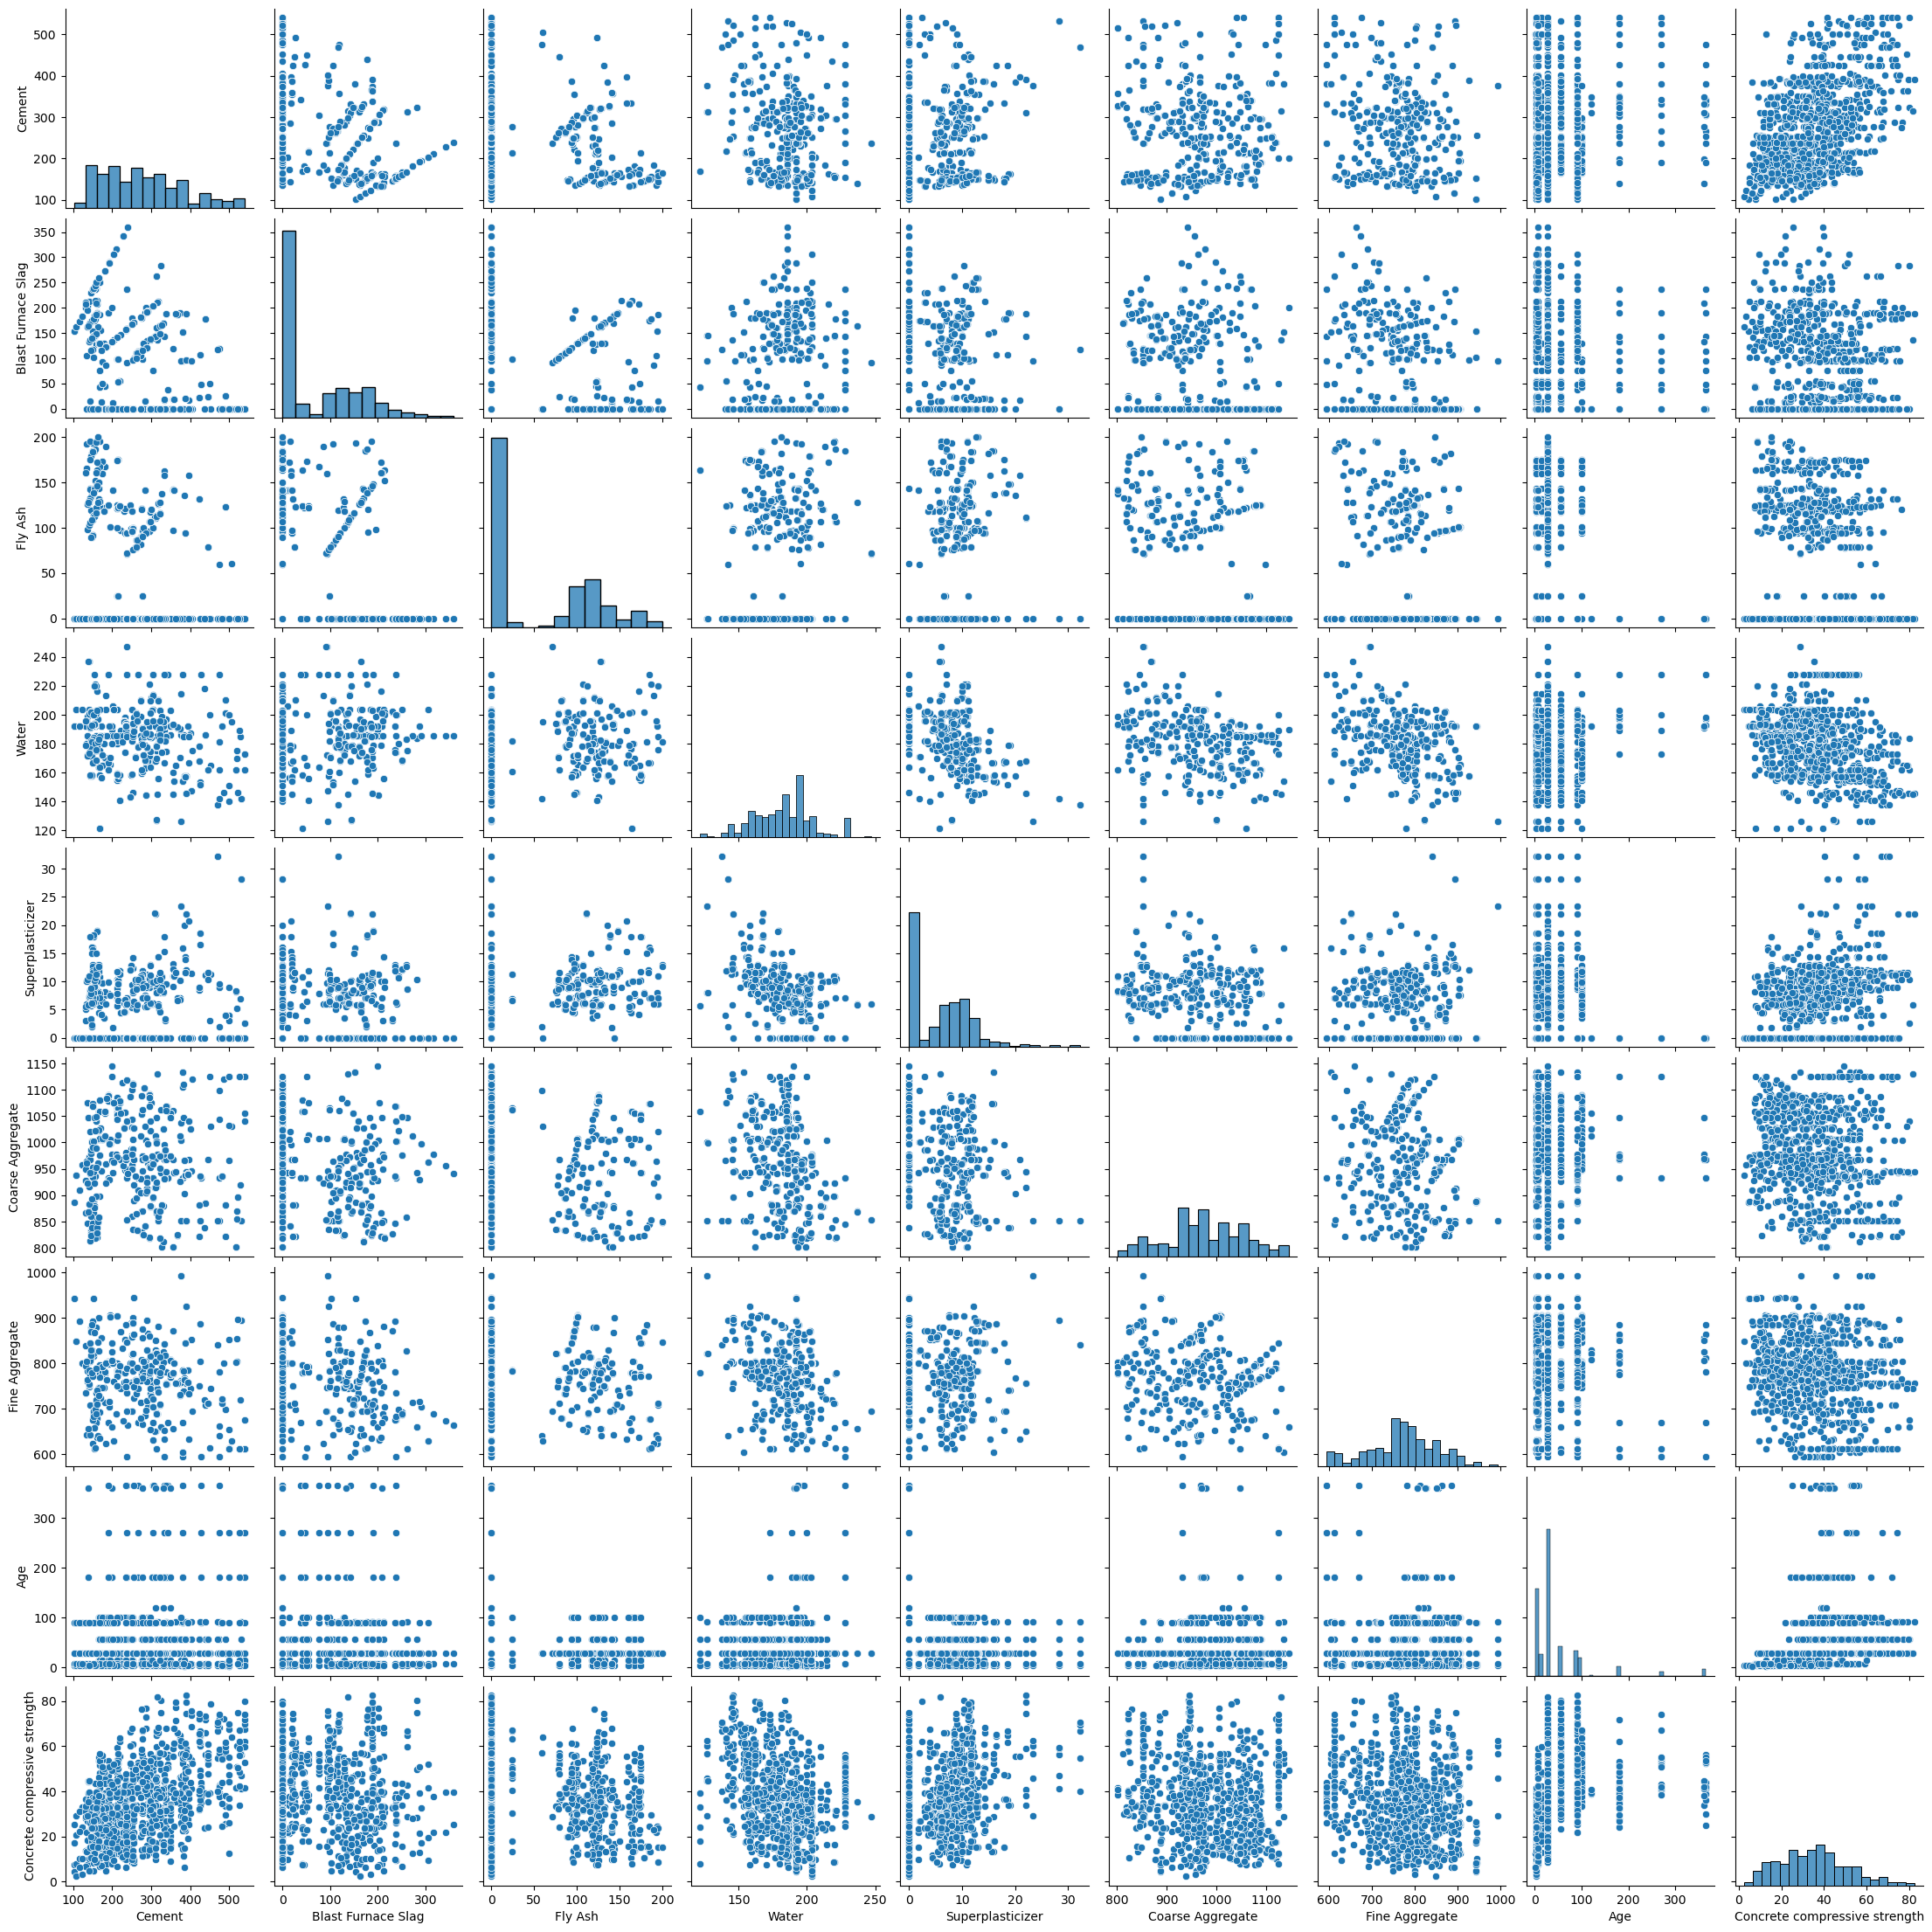

In [23]:
sns.pairplot(concrete_data_dedup)
plt.show()

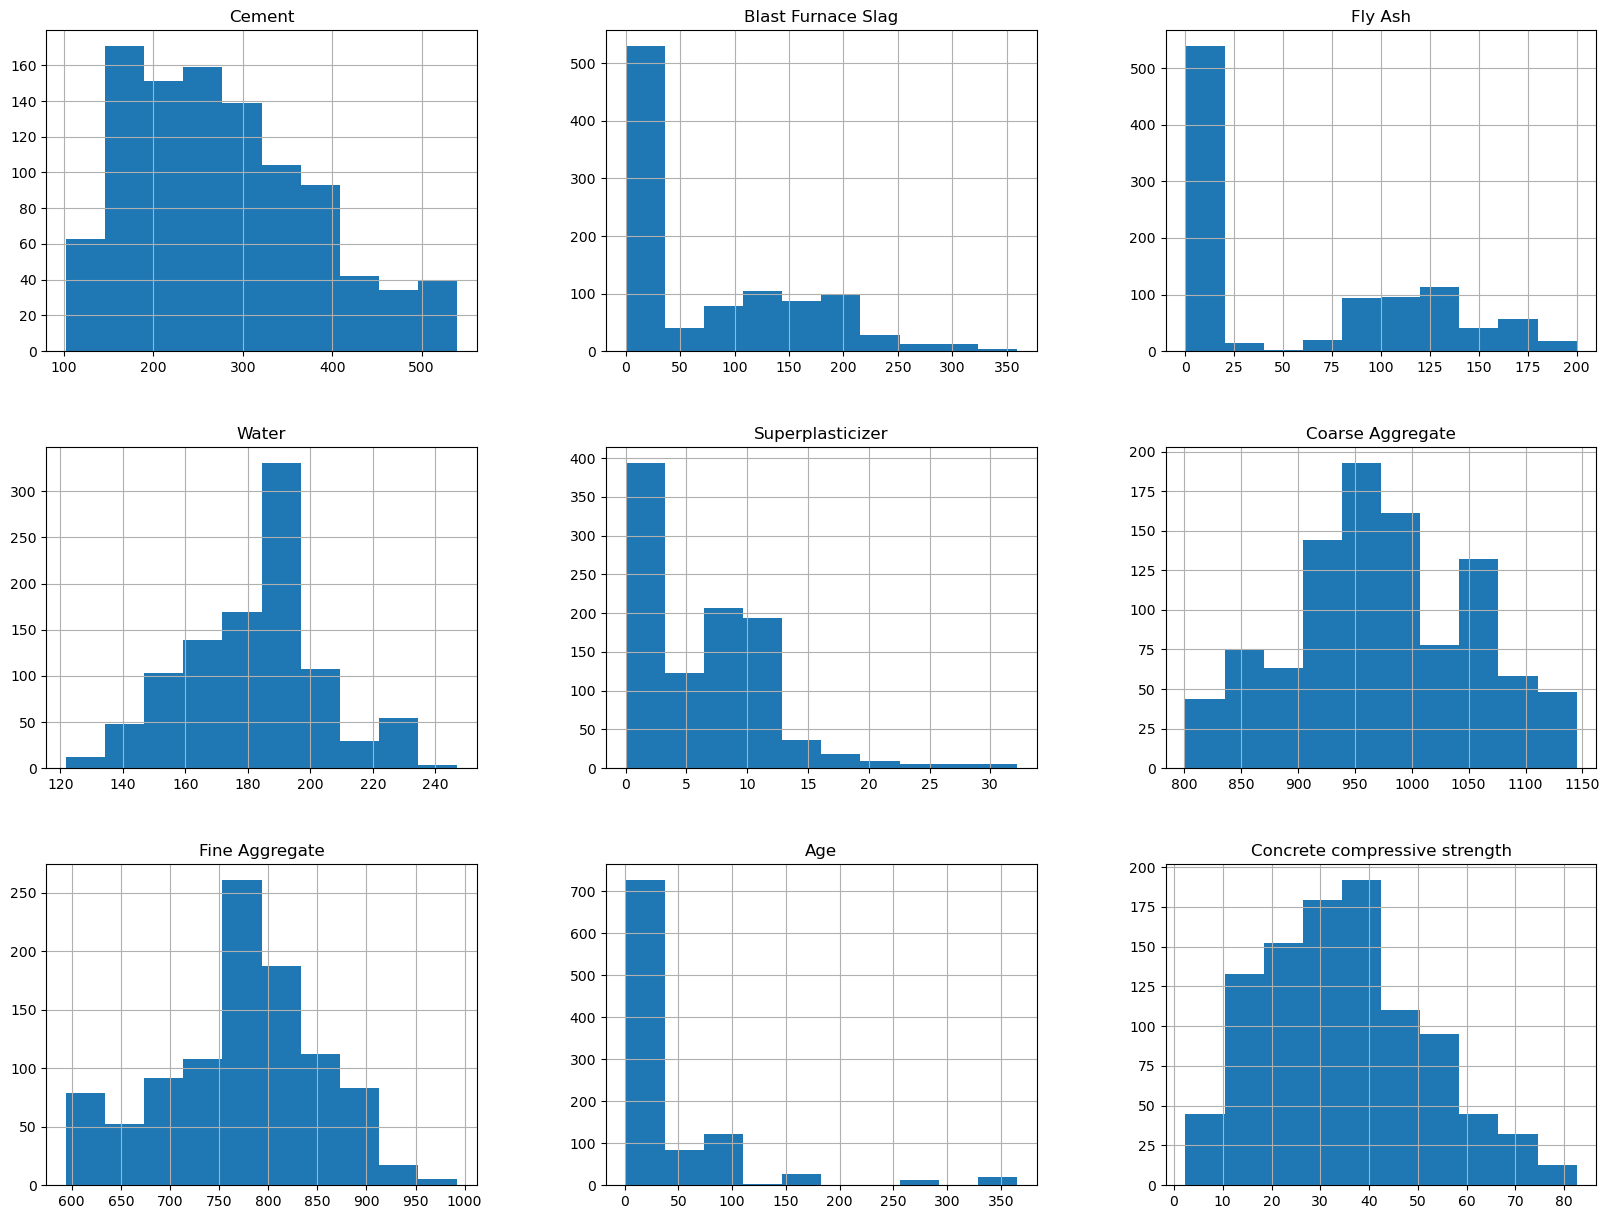

In [38]:
concrete_data_dedup.hist(figsize=(20,15))
plt.show()

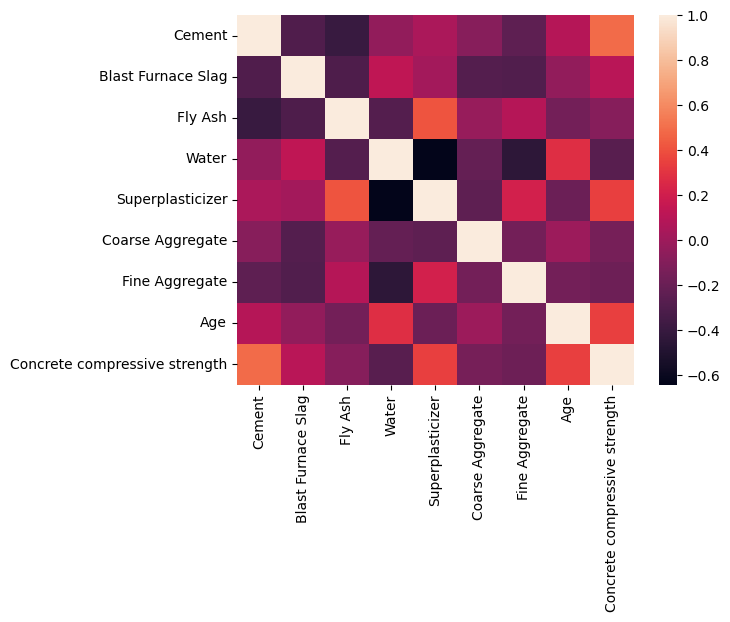

In [41]:
sns.heatmap(concrete_data_dedup.corr())
plt.show()